## Cloning Git Repository

In [ ]:
!git clone https://github.com/partha-goswami/resnet-experiments.git

Cloning into 'resnet-experiments'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 13 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (13/13), 7.91 KiB | 2.64 MiB/s, done.


## Imports

In [ ]:
!pip install torch_lr_finder
import torch
import torch.nn
import torchvision
from torchvision import datasets, transforms
import albumentations
from albumentations.pytorch.transforms import ToTensorV2
import numpy as np
from torchsummary import summary
from tqdm import tqdm
import torch.optim as optim
from torch.optim.lr_scheduler import StepLR, OneCycleLR
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from torch_lr_finder import LRFinder
import utils
import main
import custom_resnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## The Model

In [ ]:
model = Custom_ResNet()

## Model Summary

In [ ]:
print_model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

## Find LR
*(Here we try to find the best LR within a search space. There are two options, either we can go with the LR for which the decrease of loss is the steepest, or secondly, where the loss is minimum.)*

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


/usr/local/lib/python3.8/dist-packages/albumentations/augmentations/dropout/cutout.py:50: FutureWarning: Cutout has been deprecated. Please use CoarseDropout
  warnings.warn(


Files already downloaded and verified
Files already downloaded and verified


  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 1.11E-02


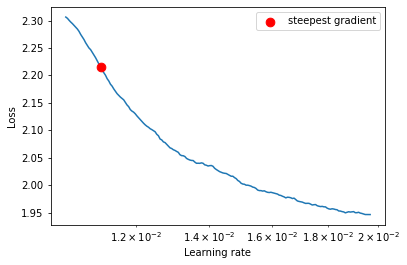

In [ ]:
max_lr = find_lr(model)

In [ ]:
max_lr

0.01993045814949275

## Running Experiment

In [ ]:
model, train_accuracy, train_losses, test_accuracy, test_losses = experiment(model)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
Epoch 1:


Loss=1.9853075742721558 Batch_id=97 Accuracy=45.65: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]



Test set: Average loss: 0.0039, Accuracy: 4946/10000 (49.46%)

Epoch 2:


Loss=1.8973478078842163 Batch_id=97 Accuracy=52.55: 100%|██████████| 98/98 [00:27<00:00,  3.59it/s]



Test set: Average loss: 0.0038, Accuracy: 5470/10000 (54.70%)

Epoch 3:


Loss=1.8752753734588623 Batch_id=97 Accuracy=61.35: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]



Test set: Average loss: 0.0037, Accuracy: 6280/10000 (62.80%)

Epoch 4:


Loss=1.7780725955963135 Batch_id=97 Accuracy=65.95: 100%|██████████| 98/98 [00:25<00:00,  3.80it/s]



Test set: Average loss: 0.0036, Accuracy: 6515/10000 (65.15%)

Epoch 5:


Loss=1.7267018556594849 Batch_id=97 Accuracy=71.05: 100%|██████████| 98/98 [00:26<00:00,  3.72it/s]



Test set: Average loss: 0.0035, Accuracy: 6972/10000 (69.72%)

Epoch 6:


Loss=1.7046022415161133 Batch_id=97 Accuracy=76.23: 100%|██████████| 98/98 [00:26<00:00,  3.68it/s]



Test set: Average loss: 0.0034, Accuracy: 7610/10000 (76.10%)

Epoch 7:


Loss=1.6680104732513428 Batch_id=97 Accuracy=79.44: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]



Test set: Average loss: 0.0034, Accuracy: 7882/10000 (78.82%)

Epoch 8:


Loss=1.6752477884292603 Batch_id=97 Accuracy=81.48: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]



Test set: Average loss: 0.0034, Accuracy: 7809/10000 (78.09%)

Epoch 9:


Loss=1.6374112367630005 Batch_id=97 Accuracy=82.88: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]



Test set: Average loss: 0.0034, Accuracy: 7813/10000 (78.13%)

Epoch 10:


Loss=1.6307858228683472 Batch_id=97 Accuracy=84.62: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]



Test set: Average loss: 0.0033, Accuracy: 8117/10000 (81.17%)

Epoch 11:


Loss=1.608736515045166 Batch_id=97 Accuracy=85.86: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]



Test set: Average loss: 0.0033, Accuracy: 8356/10000 (83.56%)

Epoch 12:


Loss=1.6203092336654663 Batch_id=97 Accuracy=86.70: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]



Test set: Average loss: 0.0033, Accuracy: 8195/10000 (81.95%)

Epoch 13:


Loss=1.6252192258834839 Batch_id=97 Accuracy=87.70: 100%|██████████| 98/98 [00:26<00:00,  3.67it/s]



Test set: Average loss: 0.0033, Accuracy: 8465/10000 (84.65%)

Epoch 14:


Loss=1.6070406436920166 Batch_id=97 Accuracy=88.79: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]



Test set: Average loss: 0.0032, Accuracy: 8476/10000 (84.76%)

Epoch 15:


Loss=1.570643663406372 Batch_id=97 Accuracy=89.37: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]



Test set: Average loss: 0.0032, Accuracy: 8603/10000 (86.03%)

Epoch 16:


Loss=1.5656912326812744 Batch_id=97 Accuracy=90.26: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]



Test set: Average loss: 0.0032, Accuracy: 8699/10000 (86.99%)

Epoch 17:


Loss=1.5762617588043213 Batch_id=97 Accuracy=91.10: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]



Test set: Average loss: 0.0032, Accuracy: 8827/10000 (88.27%)

Epoch 18:


Loss=1.5618653297424316 Batch_id=97 Accuracy=91.86: 100%|██████████| 98/98 [00:26<00:00,  3.76it/s]



Test set: Average loss: 0.0032, Accuracy: 8669/10000 (86.69%)

Epoch 19:


Loss=1.5463249683380127 Batch_id=97 Accuracy=92.78: 100%|██████████| 98/98 [00:26<00:00,  3.74it/s]



Test set: Average loss: 0.0032, Accuracy: 8890/10000 (88.90%)

Epoch 20:


Loss=1.5560784339904785 Batch_id=97 Accuracy=93.63: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]



Test set: Average loss: 0.0032, Accuracy: 8924/10000 (89.24%)

Epoch 21:


Loss=1.5329385995864868 Batch_id=97 Accuracy=94.32: 100%|██████████| 98/98 [00:26<00:00,  3.67it/s]



Test set: Average loss: 0.0032, Accuracy: 8881/10000 (88.81%)

Epoch 22:


Loss=1.5334198474884033 Batch_id=97 Accuracy=95.05: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]



Test set: Average loss: 0.0031, Accuracy: 9039/10000 (90.39%)

Epoch 23:


Loss=1.5167112350463867 Batch_id=97 Accuracy=95.39: 100%|██████████| 98/98 [00:26<00:00,  3.75it/s]



Test set: Average loss: 0.0024, Accuracy: 9375/10000 (93.75%)

Epoch 24:


Loss=1.5224034786224365 Batch_id=97 Accuracy=95.65: 100%|██████████| 98/98 [00:26<00:00,  3.73it/s]



Test set: Average loss: 0.0021, Accuracy: 9386/10000 (93.86%)



## Identifying wrong predictions

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


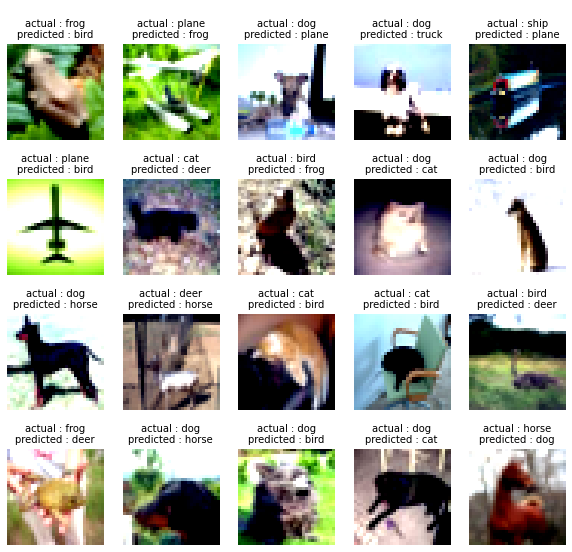

In [ ]:
wrong_predictions = identify_wrong_predictions(model)

## Plotting Model Metrics

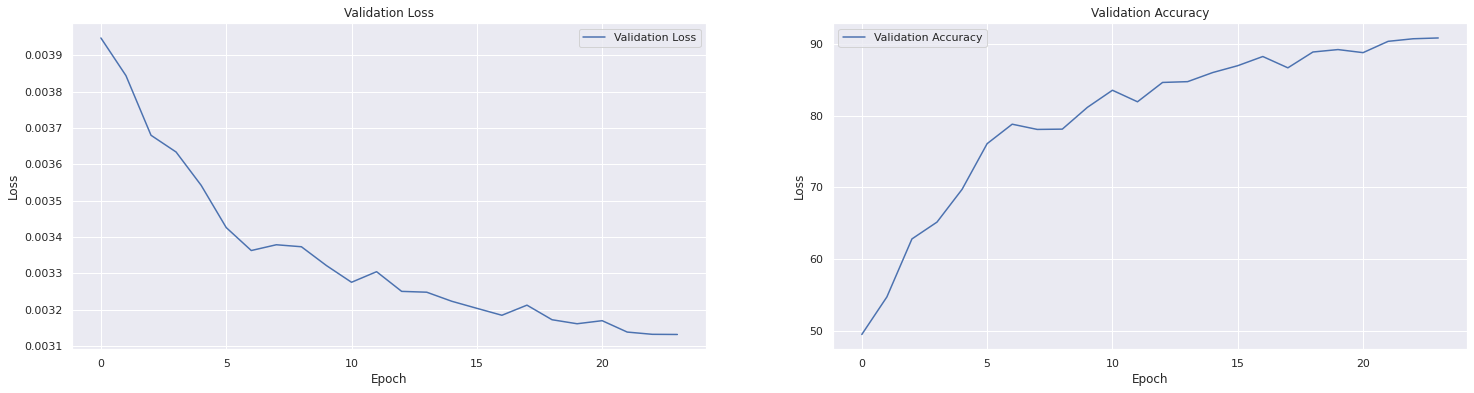

In [ ]:
plot_metrics(train_accuracy, train_losses, test_accuracy, test_losses)

## GradCAM Plots

torch.Size([10, 10])
Generating Grad-CAM @layer2


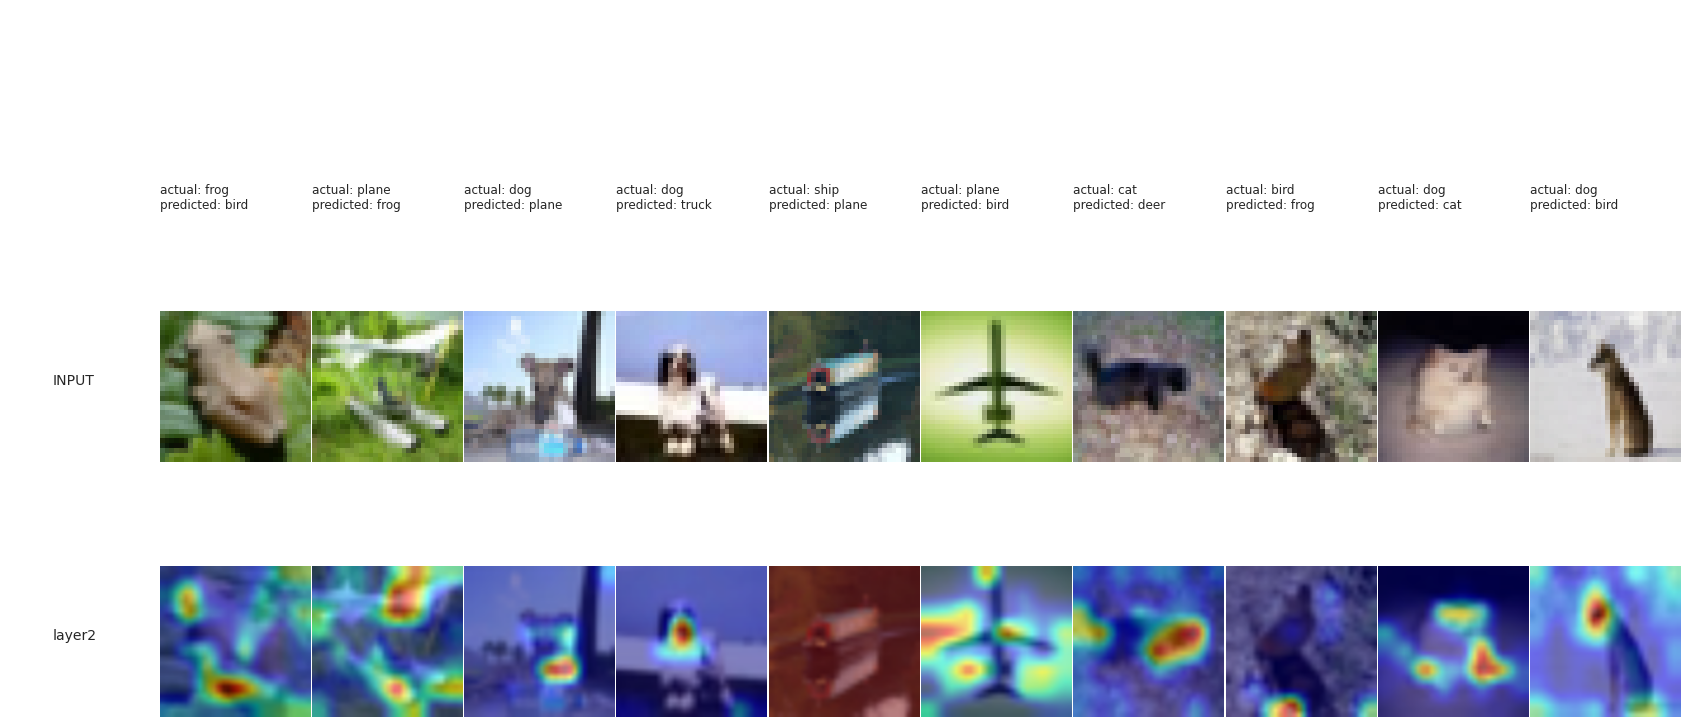

In [ ]:
plot_gradCAM(wrong_predictions, 10, model, start = 0)

torch.Size([10, 10])
Generating Grad-CAM @layer2


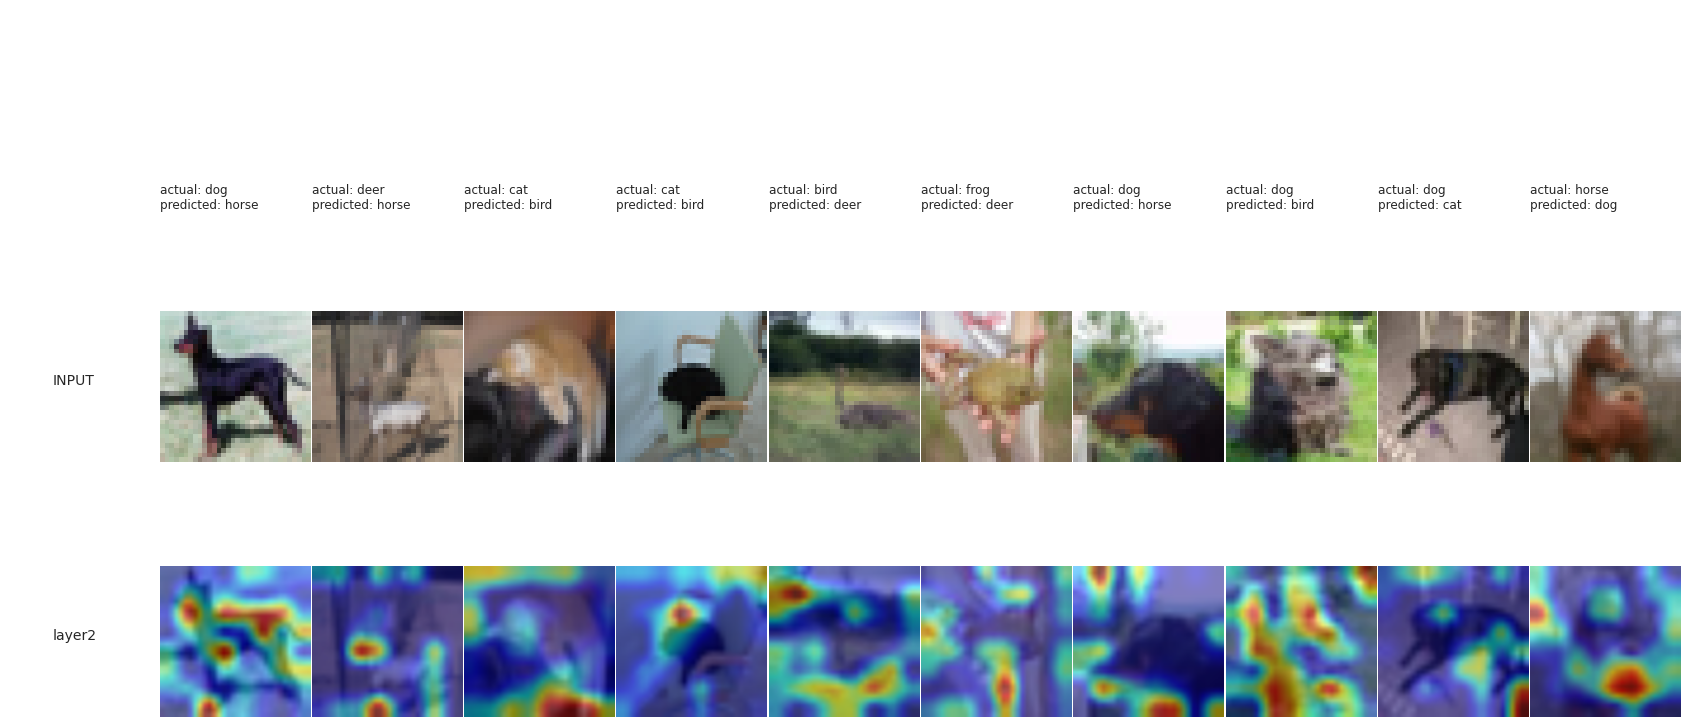

In [ ]:
plot_gradCAM(wrong_predictions, 20, model, start = 10)